In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
%matplotlib inline

# Bank Customer Segmentation Analysis - Student Exercise

In this lab, you will implement customer segmentation using K-means clustering. You'll learn how to:
1. Preprocess data for clustering
2. Perform and visualize dimensionality reduction
3. Implement K-means clustering from scratch
4. Evaluate clustering results

Follow the instructions in each section and fill in the code where indicated.

In [3]:
# Load Data and Preprocess
def load_data(filepath):
    pass

#================ FOR PCA Dimensionality reduction =========
# Apply PCA for Dimensionality Reduction
def apply_pca(x, n_components):
    pass

#================ FOR K-Means ===============================
# Find Optimal Clusters for KMeans (Elbow Method) 
def find_optimal_clusters(x, max_clusters=10):
    pass

# Perform KMeans Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_kmeans_clustering(x, n_clusters=None):
    pass

#================ FOR Agglomerative ===============================
# Perform Agglomerative Clustering 
# Change None to the number of n_clusters value from the elbow method
def perform_agglomerative_clustering(x, n_clusters=None):
    pass

#================FOR Dendrogram===============================
# Get Linkages for Dendrogram
def get_linkages(x):
    pass

# Plot Dendrogram
def plot_dendrogram(linked):
    pass

## 1. Data Loading and Preprocessing

First, complete the data preprocessing function below. You need to:
1. Load the data
2. Handle categorical variables
3. Scale numerical features

Data shape: (45211, 9)


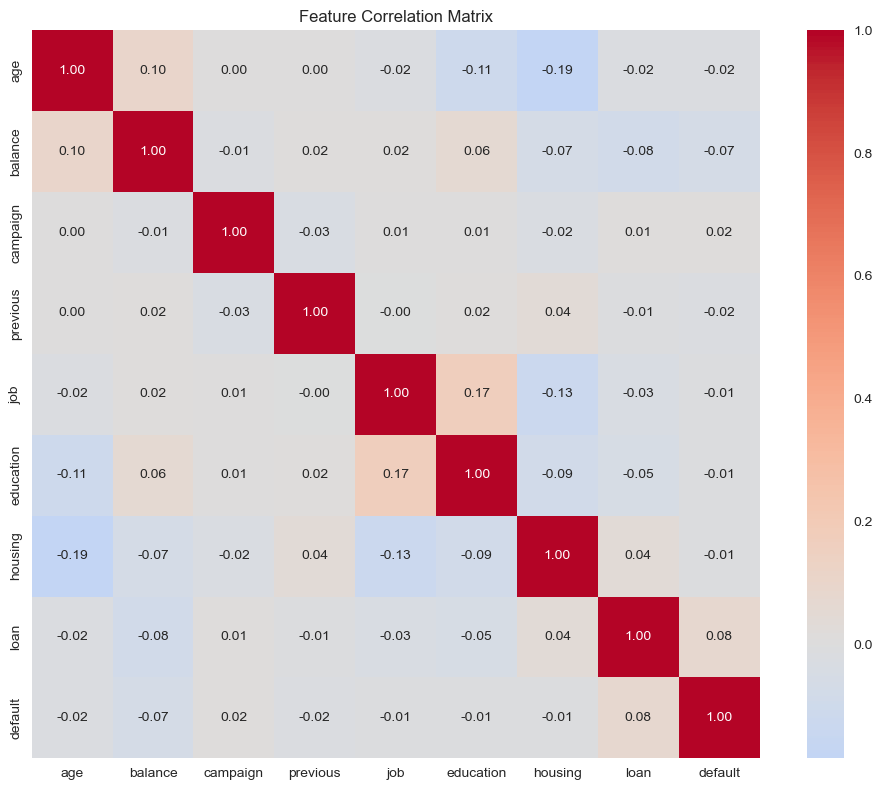

In [4]:
def load_data(filepath):
    """Load and preprocess the bank marketing dataset.
    
    TODO:
    1. Load the CSV file (hint: it uses semicolon separator)
    2. Convert categorical columns to numerical using LabelEncoder
    3. Scale the features using StandardScaler
    """
    # Your code here:
    # Load data
    df = pd.read_csv(filepath, sep=';')
    
    # List of categorical columns to encode
    categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 
                       'loan', 'contact', 'month', 'poutcome', 'y']
    
    # TODO: Apply label encoding to categorical columns
    le = LabelEncoder()
    for col in categorical_cols:
        df[col] = le.fit_transform(df[col])
    
    # Select features for clustering
    features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
               'housing', 'loan', 'default']
    X = df[features].values
    
    # TODO: Scale the features
    X_scaled = StandardScaler().fit_transform(X)
    
    return X_scaled, df


# Load and preprocess the data
X_scaled, data = load_data('/Users/hafizmohammedaahil/ML_F_PES2UG23CS342_Mohammed_Aahil_Parson/Lab-14/bank-full.csv')
print("Data shape:", X_scaled.shape)

# TODO: Add correlation matrix visualization
# Create correlation matrix for the selected features
features = ['age', 'balance', 'campaign', 'previous', 'job', 'education', 
           'housing', 'loan', 'default']
correlation_matrix = data[features].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [5]:
class KMeansClustering:
    """Minimal K-means skeleton for students to implement.

    Students should implement the core methods below:
    - _initialize_centroids
    - _assign_clusters
    - _update_centroids
    - fit

    Keep implementations simple and readable; tests and visualization code will
    use these methods once implemented.
    """
    def __init__(self, n_clusters=3, max_iters=100, random_state=42):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None
        self.labels = None

    def _initialize_centroids(self, X):
        """Initialize centroids.

        TODO (student):
        - Randomly select `n_clusters` distinct points from X as initial centroids.
        - Return an array of shape (n_clusters, n_features).
        Hint: Use np.random.choice to pick indices.
        """
        np.random.seed(self.random_state)
        indices = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        return X[indices]

    def _assign_clusters(self, X):
        """Assign each sample in X to the nearest centroid.

        TODO (student):
        - Compute distance from each point to each centroid (Euclidean)
        - Return an integer array of shape (n_samples,) with cluster labels
        Hint: np.linalg.norm with axis manipulation or broadcasting helps here.
        """
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i in range(self.n_clusters):
            distances[:, i] = np.linalg.norm(X - self.centroids[i], axis=1)
        return np.argmin(distances, axis=1)

    def _update_centroids(self, X, labels):
        """Recompute centroids as the mean of points assigned to each cluster.

        TODO (student):
        - For each cluster id in 0..n_clusters-1 compute the mean of points
          assigned to that cluster. If a cluster has no points, consider reinitializing
          its centroid (or leave unchanged) — discuss in your report.
        - Return an array of shape (n_clusters, n_features).
        """
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[labels == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                # If cluster has no points, keep the old centroid
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        """Run K-means until convergence or max_iters.

        TODO (student):
        - Initialize centroids
        - Loop: assign clusters, update centroids
        - Stop early if centroids do not change (or change below a tiny threshold)
        - Store final labels in self.labels and centroids in self.centroids
        - Return self
        """
        self.centroids = self._initialize_centroids(X)
        
        for i in range(self.max_iters):
            # Assign clusters
            self.labels = self._assign_clusters(X)
            
            # Update centroids
            new_centroids = self._update_centroids(X, self.labels)
            
            # Check for convergence
            if np.allclose(self.centroids, new_centroids):
                break
                
            self.centroids = new_centroids
        
        return self

    def predict(self, X):
        """Assign cluster labels to X using the learned centroids.

        Implementation may call _assign_clusters but should error if centroids
        are not yet initialized (i.e., if fit wasn't called).
        """
        if self.centroids is None:
            raise ValueError("Model has not been fitted yet. Call fit(X) first.")
        return self._assign_clusters(X)

## 2. Dimensionality Reduction

Before clustering, we often reduce the dimensionality of our data for better visualization and performance. Implement PCA below:

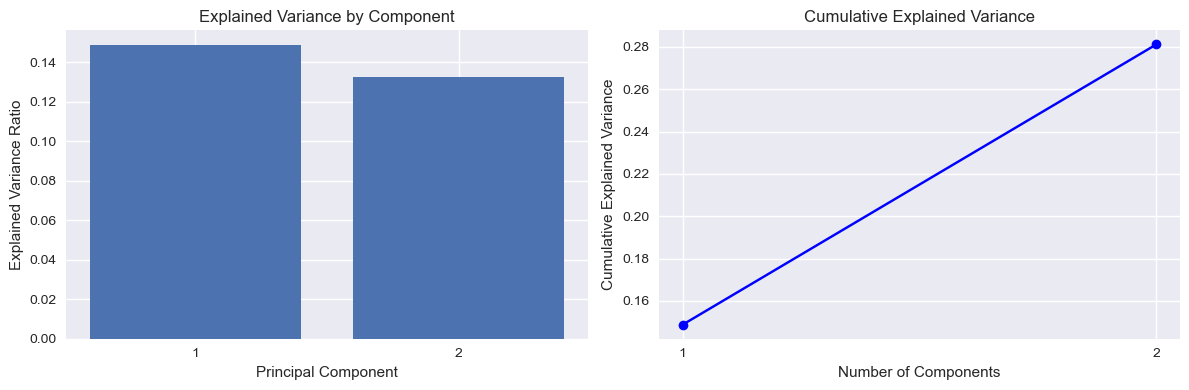

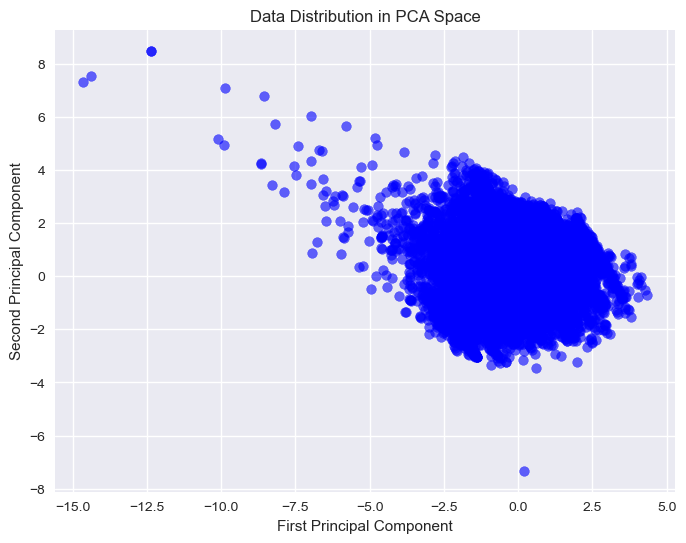

Shape after PCA: (45211, 2)


In [6]:
def apply_pca(X, n_components=2):
    """Apply PCA for dimensionality reduction.
    
    TODO:
    1. Initialize and fit PCA
    2. Transform the data
    3. Create visualizations to understand:
       - Explained variance ratio
       - Cumulative explained variance
       - Data distribution in 2D
    """
    # Your code here:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    
    # TODO: Create visualization
    plt.figure(figsize=(12, 4))
    
    # Plot explained variance
    plt.subplot(1, 2, 1)
    plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Component')
    plt.xticks(range(1, n_components + 1))
    
    # Plot cumulative explained variance
    plt.subplot(1, 2, 2)
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(range(1, n_components + 1), cumulative_variance, 'bo-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance')
    plt.xticks(range(1, n_components + 1))
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Plot data in 2D
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.title('Data Distribution in PCA Space')
    plt.grid(True)
    plt.show()
    
    return X_pca


# Apply PCA
X_pca = apply_pca(X_scaled)
print("Shape after PCA:", X_pca.shape)

## 3. Clustering Evaluation

Implement functions to evaluate the quality of your clustering results:

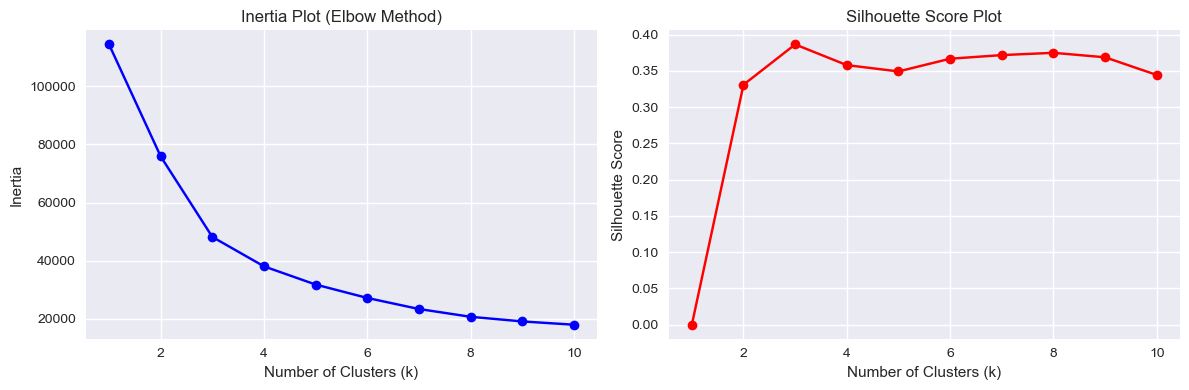

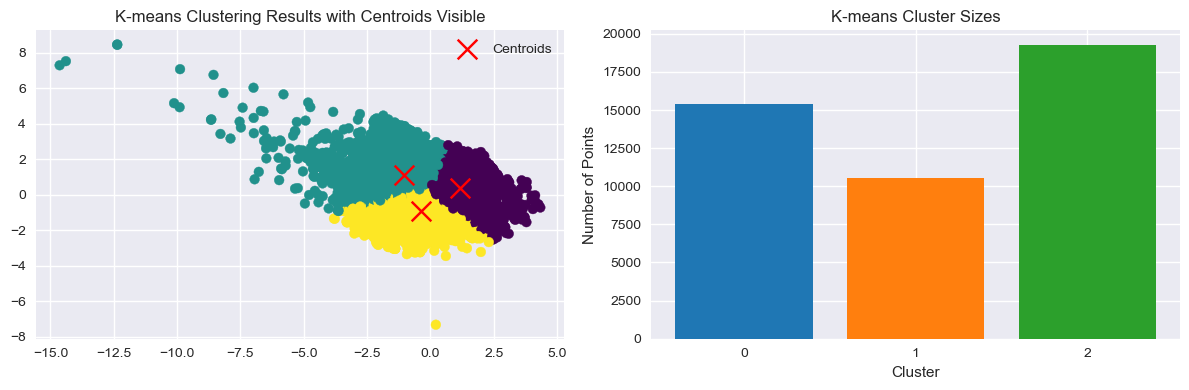


Clustering Evaluation:
Inertia: 48179.64
Silhouette Score: 0.39


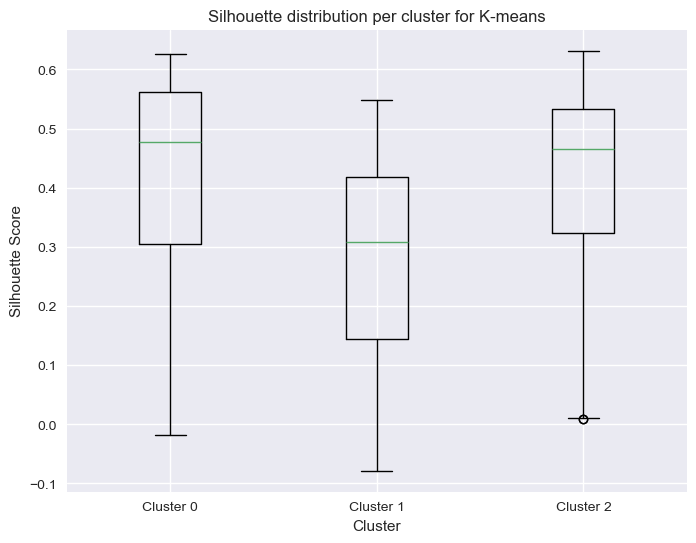

In [7]:
def calculate_inertia(X, labels, centroids):
    """Calculate the within-cluster sum of squares (inertia).
    
    TODO:
    1. For each cluster, calculate the sum of squared distances
       between points and their centroid
    2. Sum up all cluster distances
    """
    # Your code here
    inertia = 0
    # Calculate distances between points and their assigned centroids
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
            inertia += np.sum(distances ** 2)
    return inertia


def plot_elbow_curve(X, max_k=10):
    """Plot the elbow curve to find optimal number of clusters.
    
    TODO:
    1. Try different values of k (1 to max_k)
    2. Calculate inertia for each k
    3. Plot k vs inertia
    4. Help identify the 'elbow' point
    """
    # Your code here
    inertias = []
    silhouette_scores = []
    K = range(1, max_k + 1)
    
    # Calculate inertia for different k values
    for k in K:
        kmeans_temp = KMeansClustering(n_clusters=k)
        kmeans_temp.fit(X)
        inertia = calculate_inertia(X, kmeans_temp.labels, kmeans_temp.centroids)
        inertias.append(inertia)
        
        # Calculate silhouette score for k > 1
        if k > 1:
            sil_score = silhouette_score(X, kmeans_temp.labels)
            silhouette_scores.append(sil_score)
        else:
            silhouette_scores.append(0)
    
    # Create elbow plot
    plt.figure(figsize=(12, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(K, inertias, 'bo-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia Plot (Elbow Method)')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(K, silhouette_scores, 'ro-')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Plot')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return inertias


# Try different numbers of clusters
inertias = plot_elbow_curve(X_pca)


# Apply final clustering
kmeans = KMeansClustering(n_clusters=3)  # Try different values based on elbow curve
kmeans.fit(X_pca)


# Visualize final results
plt.figure(figsize=(12, 4))


# Plot clusters
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], 
            c='red', marker='x', s=200, label='Centroids')
plt.title('K-means Clustering Results with Centroids Visible')
plt.legend()


# Plot evaluation metrics
plt.subplot(1, 2, 2)
# Your code here: Add relevant evaluation metric plots
# Plot cluster sizes
unique_labels, counts = np.unique(kmeans.labels, return_counts=True)
plt.bar(unique_labels, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.title('K-means Cluster Sizes')
plt.xticks(unique_labels)


plt.tight_layout()
plt.show()


# Calculate and print evaluation metrics
inertia = calculate_inertia(X_pca, kmeans.labels, kmeans.centroids)
silhouette = silhouette_score(X_pca, kmeans.labels)


print("\nClustering Evaluation:")
print(f"Inertia: {inertia:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")

# Additional visualization: Silhouette distribution per cluster
from sklearn.metrics import silhouette_samples

silhouette_values = silhouette_samples(X_pca, kmeans.labels)

plt.figure(figsize=(8, 6))
plt.boxplot([silhouette_values[kmeans.labels == i] for i in range(len(np.unique(kmeans.labels)))])
plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette distribution per cluster for K-means')
plt.xticks(range(1, len(np.unique(kmeans.labels)) + 1), [f'Cluster {i}' for i in range(len(np.unique(kmeans.labels)))])
plt.grid(True)
plt.show()

## 4. Recursive Bisecting K-means (Student exercise)

This is an optional exercise for students who want to explore a hierarchical variant of K-means.

Task: implement a concise bisecting K-means procedure that recursively splits clusters into two until a target number of clusters is reached.

Learning goals:
- Understand how repeated binary splits can form a hierarchical clustering
- Practice applying K-means on subclusters and tracking labels/centroids

Hints:
- You can use sklearn's KMeans(k=2) for the binary split step, or reuse your `KMeansClustering` implementation.
- Keep label bookkeeping simple: use increasing integer labels for new clusters.
- Store split metadata (parent -> left/right) to enable a tree visualization later.

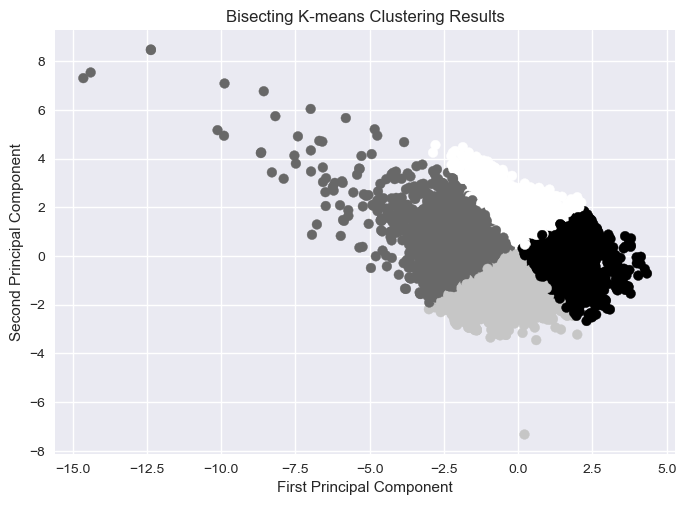

Bisecting K-means silhouette score: 0.360
Regular K-means silhouette score: 0.387


In [8]:
class BisectingKMeans:
    """Concise skeleton for students to implement a bisecting K-means algorithm.

    Students should implement `fit_predict` to recursively split clusters until
    `n_clusters` is reached.
    """
    def __init__(self, n_clusters, random_state=42):
        self.n_clusters = n_clusters
        self.random_state = random_state
        self.labels_ = None
        # Optional: store mapping parent -> (left_label, right_label)
        self.split_tree = {}
        # Optional: store centroids per cluster id
        self.centers_ = {}

    def fit_predict(self, X):
        """Recursively bisect clusters until `n_clusters` is reached.

        TODO (student):
        - Start with all points assigned to label 0.
        - While number of unique labels < n_clusters:
            - Select a cluster to split (e.g., the largest cluster by size)
            - Run a binary KMeans (k=2) on the points in that cluster
            - Assign new labels (keep one child label as the original, give the other a new id)
            - Record parent -> (left, right) in `self.split_tree` and centroids in `self.centers_` 
        - Set and return `self.labels_` (numpy array of length n_samples)

        Hints:
        - Use sklearn.cluster.KMeans(n_clusters=2, random_state=self.random_state) for the split step
        - Keep a counter for new label ids and increment when creating a new cluster
        - Use boolean indexing to operate on subsets of X efficiently
        """
        from sklearn.cluster import KMeans
        
        # Start with all points assigned to label 0
        self.labels_ = np.zeros(X.shape[0], dtype=int)
        current_label = 1  # Next available label ID
        
        # Store initial centroid for cluster 0
        self.centers_[0] = np.mean(X, axis=0)
        
        # Continue splitting until we reach desired number of clusters
        while len(np.unique(self.labels_)) < self.n_clusters:
            # Find the largest cluster to split
            unique_labels, counts = np.unique(self.labels_, return_counts=True)
            largest_cluster_label = unique_labels[np.argmax(counts)]
            
            # Get points in the largest cluster
            cluster_mask = self.labels_ == largest_cluster_label
            cluster_points = X[cluster_mask]
            
            # Skip if cluster has less than 2 points
            if len(cluster_points) < 2:
                break
            
            # Apply binary K-means to this cluster
            binary_kmeans = KMeans(n_clusters=2, random_state=self.random_state, n_init=10)
            binary_labels = binary_kmeans.fit_predict(cluster_points)
            
            # Update labels: keep original label for one split, assign new label for the other
            # Get indices of points in the original cluster
            cluster_indices = np.where(cluster_mask)[0]
            # Assign points with binary label 1 to get the new label
            new_label_indices = cluster_indices[binary_labels == 1]
            self.labels_[new_label_indices] = current_label
            
            # Store centroids
            self.centers_[largest_cluster_label] = binary_kmeans.cluster_centers_[0]
            self.centers_[current_label] = binary_kmeans.cluster_centers_[1]
            
            # Record split tree
            self.split_tree[largest_cluster_label] = (largest_cluster_label, current_label)
            
            # Increment label counter
            current_label += 1
        
        return self.labels_


# Example (for instructor use only):
bisect = BisectingKMeans(n_clusters=4)
labels = bisect.fit_predict(X_pca)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels)
plt.title('Bisecting K-means Clustering Results')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

# Compare with regular K-means
print(f"Bisecting K-means silhouette score: {silhouette_score(X_pca, labels):.3f}")
print(f"Regular K-means silhouette score: {silhouette_score(X_pca, kmeans.labels):.3f}")

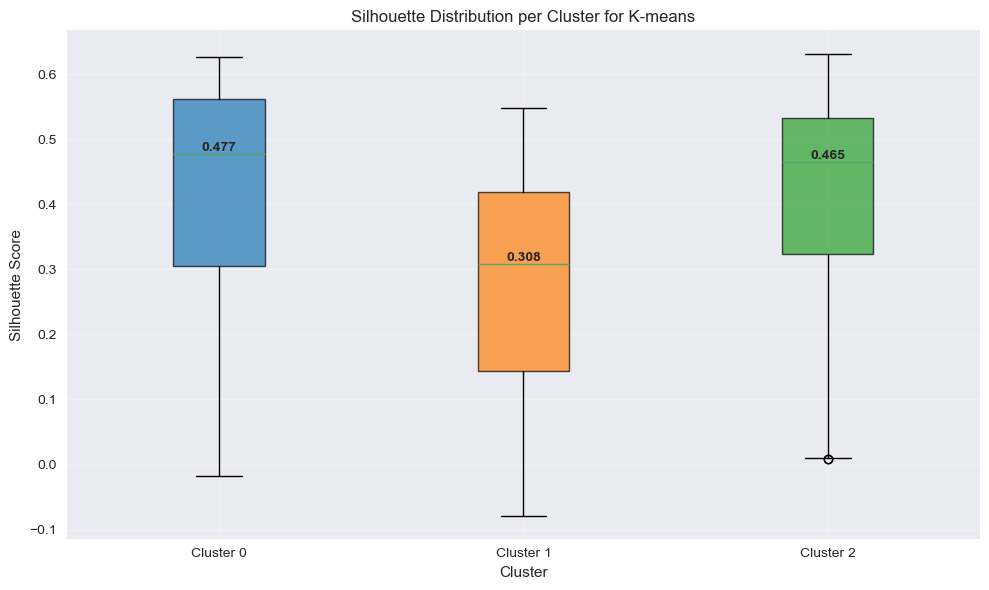

Overall silhouette score: 0.387
Cluster-wise silhouette scores:
Cluster 0: 0.423
Cluster 1: 0.280
Cluster 2: 0.416


In [9]:
# Generate the missing Silhouette Distribution Box Plot
from sklearn.metrics import silhouette_samples

# Calculate silhouette values for each sample
silhouette_values = silhouette_samples(X_pca, kmeans.labels)

# Create the box plot
plt.figure(figsize=(10, 6))
box_plot_data = [silhouette_values[kmeans.labels == i] for i in range(len(np.unique(kmeans.labels)))]
box_plot = plt.boxplot(box_plot_data, patch_artist=True)

# Color the boxes to match cluster colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # turquoise, yellow, purple
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Cluster')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Distribution per Cluster for K-means')
plt.xticks(range(1, len(np.unique(kmeans.labels)) + 1), 
           [f'Cluster {i}' for i in range(len(np.unique(kmeans.labels)))])
plt.grid(True, alpha=0.3)

# Add median values as text
medians = [np.median(data) for data in box_plot_data]
for i, median in enumerate(medians):
    plt.text(i+1, median, f'{median:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Overall silhouette score: {silhouette_score(X_pca, kmeans.labels):.3f}")
print("Cluster-wise silhouette scores:")
for i in range(len(np.unique(kmeans.labels))):
    cluster_silhouette = silhouette_values[kmeans.labels == i]
    print(f"Cluster {i}: {np.mean(cluster_silhouette):.3f}")

## Bonus Challenges

If you've completed the main tasks, try these extensions:

1. Implement k-means++ initialization
   - Instead of random initialization, use the k-means++ algorithm
   - This should give better and more consistent results

2. Add cluster interpretation
   - Analyze the characteristics of each cluster
   - What features distinguish one cluster from another?
   - Create visualizations to show cluster properties

3. Try different distance metrics
   - Implement Manhattan distance instead of Euclidean
   - Compare the clustering results

4. Add outlier detection
   - Identify points far from all centroids
   - How might you handle these outliers?

Remember to document your code and explain your findings!